In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample PPI network graph
ppi_graph = nx.Graph()

In [ ]:
# Add nodes (proteins)
ppi_graph.add_nodes_from(["P1", "P2", "P3", "P4", "P5"])

In [ ]:
# Add edges (interactions)
ppi_graph.add_edges_from([("P1", "P2"), ("P1", "P3"), ("P2", "P4"), ("P3", "P5"), ("P4", "P5")])

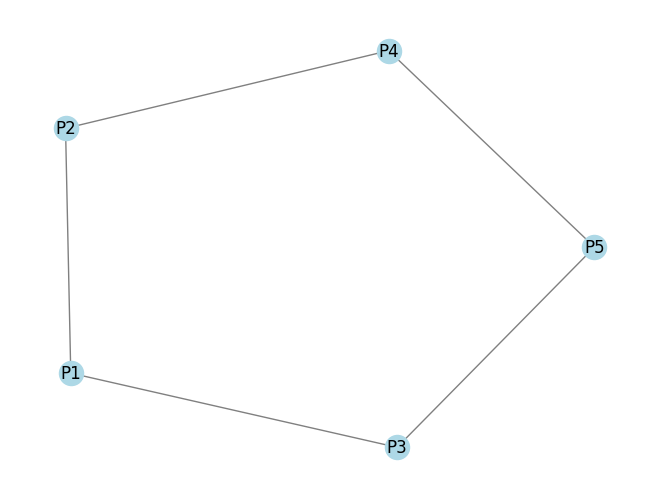

In [ ]:
# Draw the graph
nx.draw(ppi_graph, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

In [ ]:
from itertools import combinations

def is_vertex_cover(graph, subset):
  for u, v in graph.edges():
    if u not in subset and v not in subset:
      return False

  return True

def brute_force_vertex_cover(graph):
  nodes = list(graph.nodes())
  for k in range(1, len(nodes) + 1):
    for subset in combinations(nodes, k):
      if is_vertex_cover(graph, subset):
        return subset

  return None

# Find vertex cover using brute force
vertex_cover = brute_force_vertex_cover(ppi_graph)
print(f"Minimum Vertex Cover (Brute Force): {vertex_cover}")

Minimum Vertex Cover (Brute Force): ('P1', 'P2', 'P5')


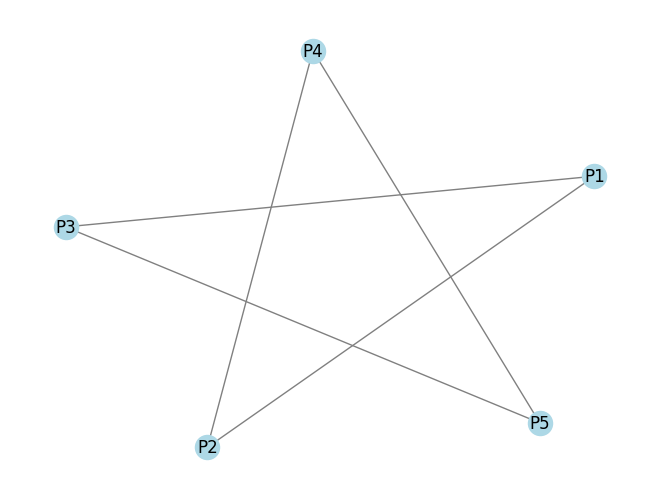

In [ ]:
# Draw the graph
nx.draw(ppi_graph, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

In [ ]:
def greedy_vertex_cover(graph):
  cover = set()
  edges = set(graph.edges())

  while edges:

    # Find the vertex with the maximum degree
    degrees = {node: len(list(graph.neighbors(node))) for node in graph.nodes}
    max_degree_node = max(degrees, key=degrees.get)

    # Add the node to the cover and remove its edges
    cover.add(max_degree_node)
    for neighbor in list(graph.neighbors(max_degree_node)):
      edges.discard((max_degree_node, neighbor))
      edges.discard((neighbor, max_degree_node))

    graph.remove_node(max_degree_node)

  return cover

# Create a copy of the graph (since the algorithm modifies it)
approx_cover = greedy_vertex_cover(ppi_graph.copy())
print(f"Approximate Vertex Cover (Greedy): {approx_cover}")

Approximate Vertex Cover (Greedy): {'P1', 'P4', 'P3'}


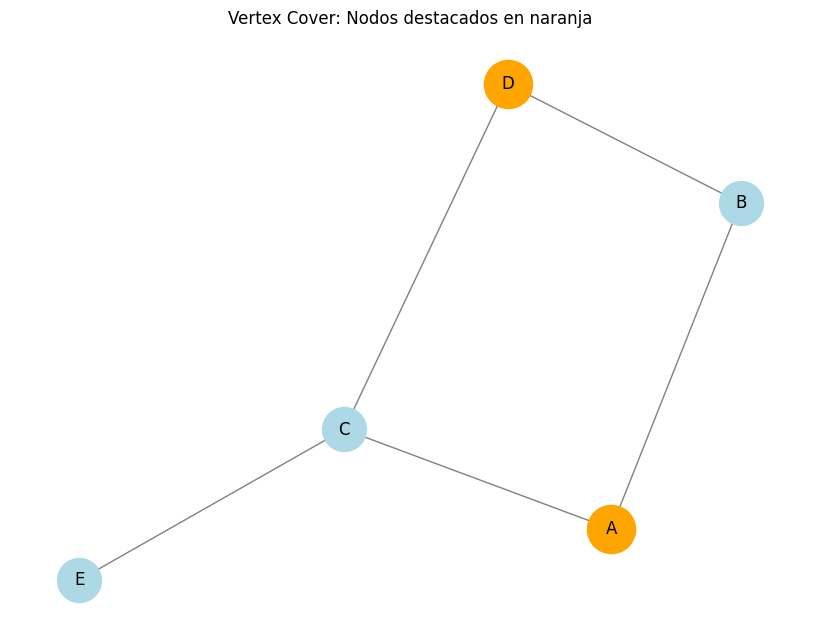

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo de ejemplo
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])

# Vertex Cover (puedes cambiar este conjunto por el resultado de un algoritmo)
vertex_cover = {"A", "D"}

# Dibujar el grafo
pos = nx.spring_layout(G) # Posiciones de los nodos
plt.figure(figsize=(8, 6))

# Dibujar todos los nodos y bordes
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

# Resaltar los nodos en el Vertex Cover
nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover, node_color="orange", node_size=1200)

# Mostrar el grafo
plt.title("Vertex Cover: Nodos destacados en naranja")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Enable interactive plots in Colab
%matplotlib notebook

# Crear un grafo
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])

# Inicializar datos para la animación
pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout
edges = list(G.edges())
covered_edges = []
vertex_cover = []

# Función para actualizar el grafo en cada paso
def update(frame):
    global covered_edges, vertex_cover

    if frame < len(edges):
        # Seleccionar un nodo y cubrir sus aristas
        edge = edges[frame]
        if edge[0] not in vertex_cover and edge[1] not in vertex_cover:
            vertex_cover.append(edge[0])
            covered_edges.append(edge)

    # Dibujar el grafo
    plt.cla()
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=1000, font_size=12)

    # Resaltar los nodos del Vertex Cover
    nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover,
                          node_color="orange", node_size=1200)

    # Resaltar las aristas cubiertas
    nx.draw_networkx_edges(G, pos, edgelist=covered_edges, edge_color="red")

    # Título dinámico
    plt.title(f"Paso {frame + 1}: Nodos en Vertex Cover: {vertex_cover}")

# Crear la animación
fig = plt.figure(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=len(edges), interval=1000, repeat=False)

# Para Google Colab, mostrar como HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

# -- Qué pasa aqui?????

1. **Procesa las aristas una por una** en el orden que aparecen en la lista
2. **Para cada arista**: si ninguno de sus dos nodos está ya en el vertex cover, agrega el **primer nodo** al conjunto
3. **Marca esa arista específica** como cubierta (en rojo)
4. **Continúa** hasta procesar todas las aristas


=== INFORMACIÓN DEL GRAFO ===
Nodos: ['A', 'B', 'C', 'D']
Aristas: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D')]
Número de nodos: 4
Número de aristas: 4

=== VERTEX COVERS ===
Brute-force cover: {'D', 'A'}
Greedy cover: {'C', 'A'}
¿Brute-force cover es válido? True
¿Greedy cover es válido? False

=== ANÁLISIS ===
Tamaño óptimo: 2
Tamaño greedy: 2
Ratio de aproximación: 1.00


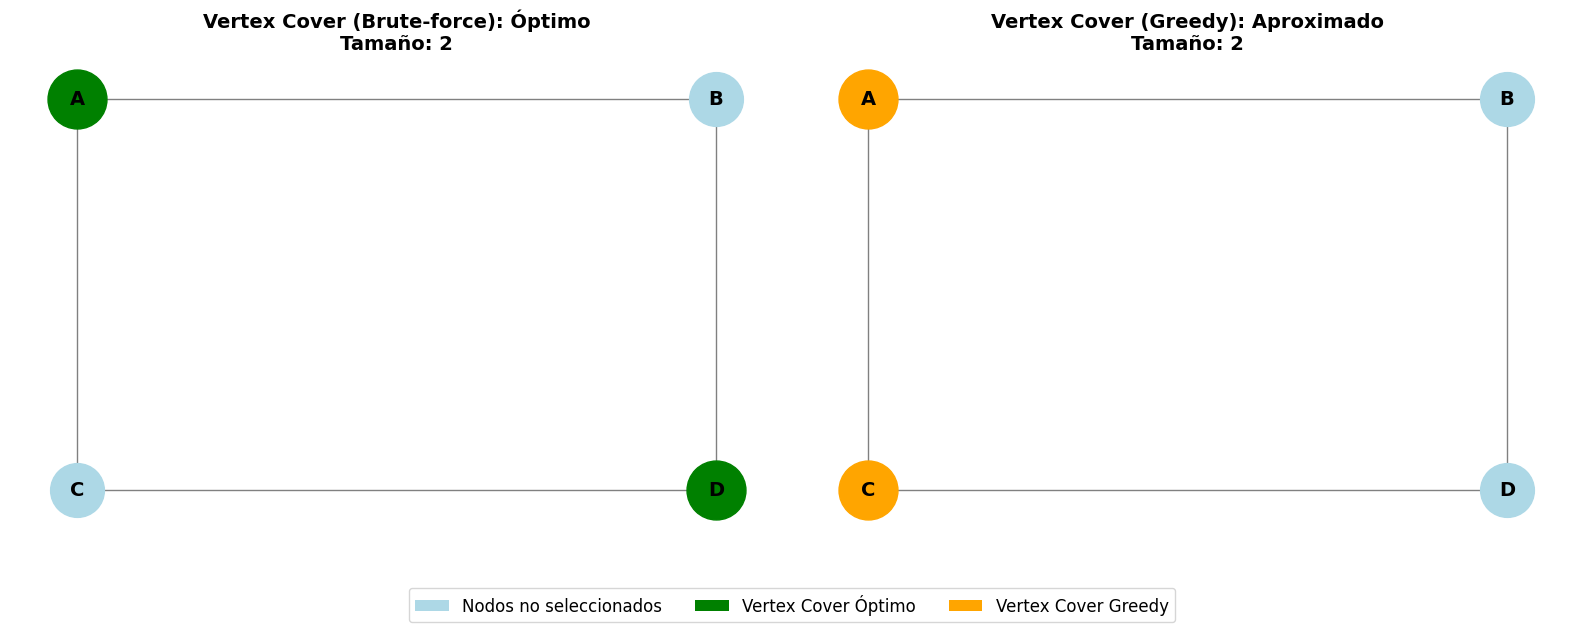


=== VERIFICACIÓN DETALLADA ===
Aristas y qué nodos las cubren:
  ('A', 'B'): BF ✓ True, Greedy ✓ True
  ('A', 'C'): BF ✓ True, Greedy ✓ True
  ('B', 'D'): BF ✓ True, Greedy ✓ False
  ('C', 'D'): BF ✓ True, Greedy ✓ True

=== VISUALIZACIÓN ALTERNATIVA (si la anterior falla) ===


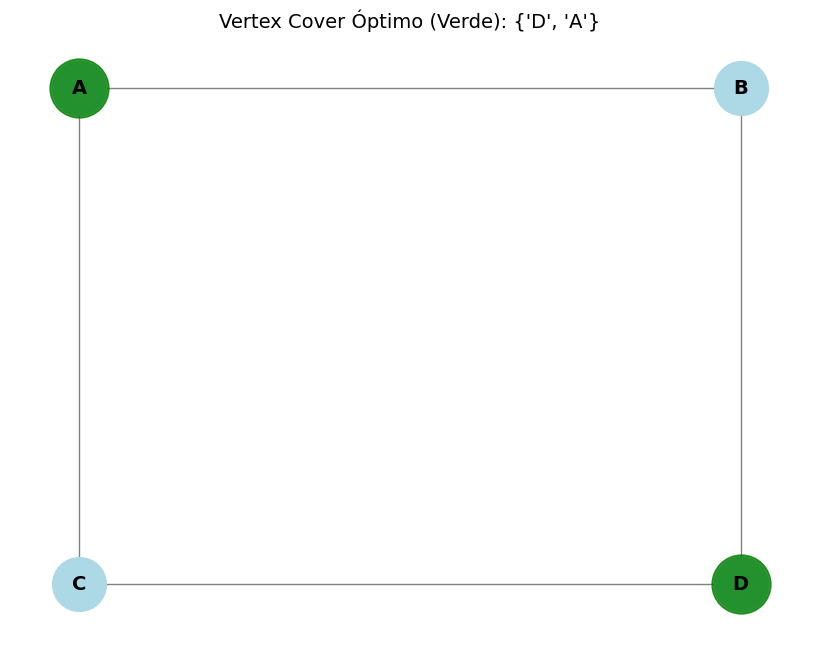

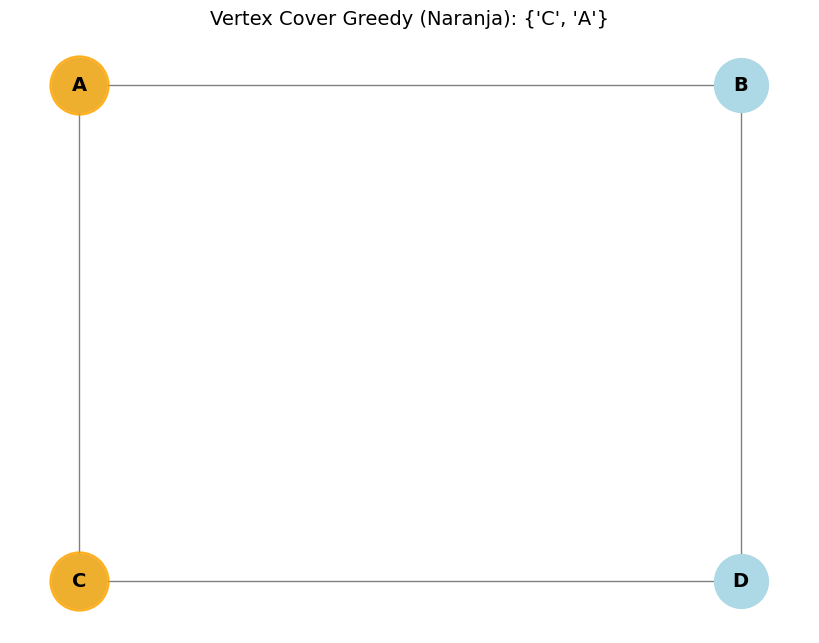

In [ ]:
# Instalación de dependencias (ejecutar solo si es necesario)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Configuración para Google Colab - Fix para errores de matplotlib
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
%matplotlib inline

# Limpiar cualquier figura previa
plt.clf()
plt.close('all')

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# Crear el grafo
G = nx.Graph()

# Agregar nodos
G.add_nodes_from(['A', 'B', 'C', 'D'])

# Agregar aristas para crear un grafo donde sea posible comparar los algoritmos
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D')])

# Definir posiciones para los nodos (puedes cambiar estas coordenadas)
pos = {
    'A': (0, 1),
    'B': (1, 1),
    'C': (0, 0),
    'D': (1, 0)
}

# Vertex Cover obtenido por Brute-force (resultado óptimo)
brute_force_cover = {"A", "D"}

# Vertex Cover obtenido por Greedy (aproximado)
greedy_cover = {"A", "C"}

# Función para verificar si un vertex cover es válido
def is_valid_vertex_cover(graph, vertex_cover):
    """Verifica si un conjunto de vértices es un vertex cover válido"""
    for edge in graph.edges():
        if edge[0] not in vertex_cover and edge[1] not in vertex_cover:
            return False
    return True

# Mostrar información del grafo
print("=== INFORMACIÓN DEL GRAFO ===")
print(f"Nodos: {list(G.nodes())}")
print(f"Aristas: {list(G.edges())}")
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

print("\n=== VERTEX COVERS ===")
print(f"Brute-force cover: {brute_force_cover}")
print(f"Greedy cover: {greedy_cover}")
print(f"¿Brute-force cover es válido? {is_valid_vertex_cover(G, brute_force_cover)}")
print(f"¿Greedy cover es válido? {is_valid_vertex_cover(G, greedy_cover)}")

print(f"\n=== ANÁLISIS ===")
print(f"Tamaño óptimo: {len(brute_force_cover)}")
print(f"Tamaño greedy: {len(greedy_cover)}")
ratio = len(greedy_cover) / len(brute_force_cover)
print(f"Ratio de aproximación: {ratio:.2f}")

# Crear la visualización con manejo explícito de figuras
try:
    # Crear nueva figura
    fig = plt.figure(figsize=(16, 6))

    # Subplot 1: Brute-force
    ax1 = plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=1500, font_size=14, font_weight="bold",
            ax=ax1)
    nx.draw_networkx_nodes(G, pos, nodelist=list(brute_force_cover),
                          node_color="green", node_size=1800, ax=ax1)
    ax1.set_title(f"Vertex Cover (Brute-force): Óptimo\nTamaño: {len(brute_force_cover)}",
                  fontsize=14, fontweight="bold")

    # Subplot 2: Greedy
    ax2 = plt.subplot(1, 2, 2)
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=1500, font_size=14, font_weight="bold",
            ax=ax2)
    nx.draw_networkx_nodes(G, pos, nodelist=list(greedy_cover),
                          node_color="orange", node_size=1800, ax=ax2)
    ax2.set_title(f"Vertex Cover (Greedy): Aproximado\nTamaño: {len(greedy_cover)}",
                  fontsize=14, fontweight="bold")

    # Agregar leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', label='Nodos no seleccionados'),
        Patch(facecolor='green', label='Vertex Cover Óptimo'),
        Patch(facecolor='orange', label='Vertex Cover Greedy')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)

    # Mostrar y cerrar explícitamente
    plt.show()

except Exception as e:
    print(f"Error al mostrar el gráfico: {e}")

finally:
    # Limpiar recursos
    plt.close('all')

# Mostrar qué aristas cubre cada conjunto
print("\n=== VERIFICACIÓN DETALLADA ===")
print("Aristas y qué nodos las cubren:")
for edge in G.edges():
    bf_covers = any(node in brute_force_cover for node in edge)
    greedy_covers = any(node in greedy_cover for node in edge)
    print(f"  {edge}: BF ✓ {bf_covers}, Greedy ✓ {greedy_covers}")

# Crear una visualización alternativa más simple si hay problemas
print("\n=== VISUALIZACIÓN ALTERNATIVA (si la anterior falla) ===")
try:
    # Método alternativo sin subplots complejos
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=1500, font_size=14, font_weight="bold")
    nx.draw_networkx_nodes(G, pos, nodelist=list(brute_force_cover),
                          node_color="green", node_size=1800, alpha=0.8)
    plt.title(f"Vertex Cover Óptimo (Verde): {brute_force_cover}", fontsize=14)
    plt.show()
    plt.close()

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=1500, font_size=14, font_weight="bold")
    nx.draw_networkx_nodes(G, pos, nodelist=list(greedy_cover),
                          node_color="orange", node_size=1800, alpha=0.8)
    plt.title(f"Vertex Cover Greedy (Naranja): {greedy_cover}", fontsize=14)
    plt.show()
    plt.close()

except Exception as e:
    print(f"Error en visualización alternativa: {e}")

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def vertex_cover_approximation(G):
  cover = set()
  edges = set(G.edges())

  while edges:
    u, v = edges.pop() # Pick an arbitrary edge
    cover.add(u)
    cover.add(v)
    edges = edges - set(G.edges(u)) - set(G.edges(v)) # Remove covered edges

  return cover

# Load your graph here
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

cover = vertex_cover_approximation(G)
print(f'Approximate Vertex Cover: {cover}')

Approximate Vertex Cover: {1, 2, 3}


#-- Qué entrega?????
El algoritmo entrega un conjunto de vértices ({1, 2, 3} en el ejemplo) que "cubre" todas las aristas del grafo, es decir, cada conexión tiene al menos uno de sus extremos en este conjunto. Es como elegir puntos estratégicos para monitorear todas las conexiones de una red, garantizando que ninguna arista quede sin supervisar, aunque no sea necesariamente la solución mínima.

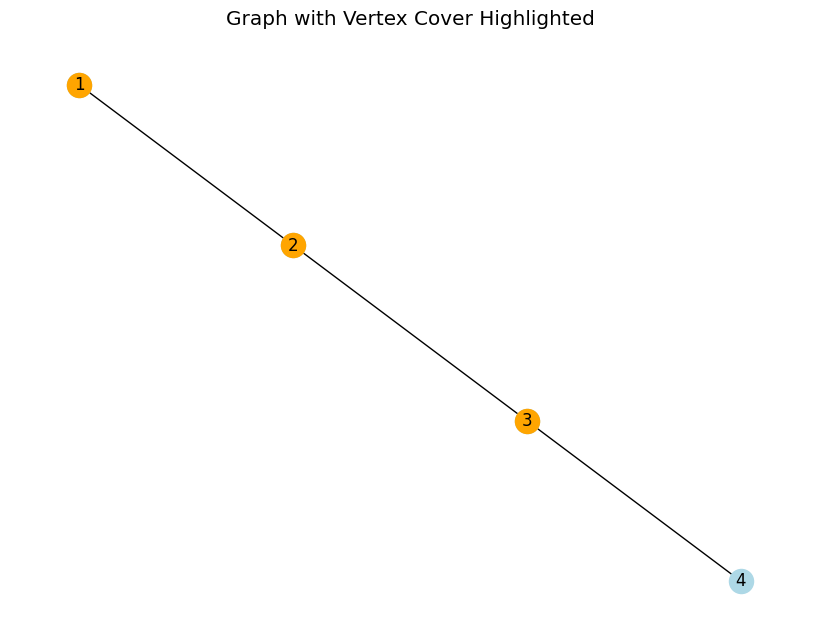

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue')

# Highlight the vertex cover
nx.draw_networkx_nodes(G, pos, nodelist=cover, node_color='orange')
plt.title('Graph with Vertex Cover Highlighted')
plt.show()

# -- Qué entrega?????
Este código dibuja un grafo con el vertex cover resaltado. Muestra todos los nodos en azul claro, pero pinta en naranja los nodos que están en la variable cover (el vertex cover), permitiendo visualizar fácilmente qué nodos fueron seleccionados para cubrir todas las aristas del grafo.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def vertex_cover_approximation(G):
  cover = set()
  edges = set(G.edges())

  while edges:
    u, v = edges.pop() # Pick an arbitrary edge
    cover.add(u)
    cover.add(v)
    edges = edges - set(G.edges(u)) - set(G.edges(v)) # Remove covered edges

  return cover

# Load your graph here
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

cover = vertex_cover_approximation(G)
print(f'Approximate Vertex Cover: {cover}')

Approximate Vertex Cover: {1, 2, 3}


# -- Que entrega?
Entrega un conjunto de vértices que "cubren" todas las aristas del grafo, aunque no necesariamente el conjunto más pequeño posible.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Secuencia inicial (realidad)
realidad = [7, 2, 5, 3, 8, 1, 4, 6]

# Secuencia deseada
deseo = sorted(realidad)

print("Realidad:", realidad)
print("Deseo:", deseo)

Realidad: [7, 2, 5, 3, 8, 1, 4, 6]
Deseo: [1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
def visualizar_progreso(realidad, deseo, paso):
  plt.figure(figsize=(10, 5))

  # Dibujar la secuencia actual (realidad)
  plt.bar(range(len(realidad)), realidad, color='lightblue', label='Realidad')

  # Dibujar la secuencia deseada
  plt.plot(range(len(deseo)), deseo, color='orange', marker='o', linestyle='-', label='Deseo')

  plt.title(f"Paso {paso}: Reordenamiento de la Secuencia")
  plt.xlabel("Índice")
  plt.ylabel("Valor")
  plt.legend()
  plt.show()

In [ ]:
def bubble_sort_visual(realidad, deseo):
  n = len(realidad)
  pasos = 0

  for i in range(n):
    for j in range(0, n-i-1):
      if realidad[j] > realidad[j+1]:
        # Intercambiar elementos
        realidad[j], realidad[j+1] = realidad[j+1], realidad[j]
      pasos += 1

  # Visualizar el progreso en cada intercambio
  visualizar_progreso(realidad, deseo, pasos)

  return realidad

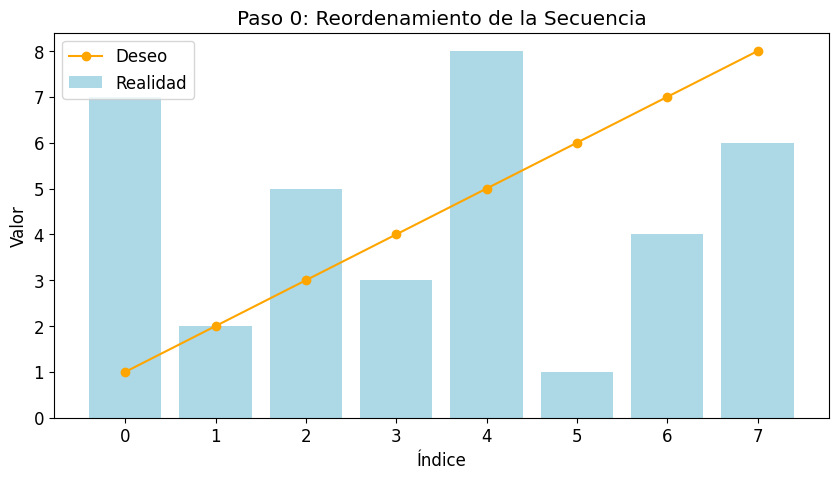

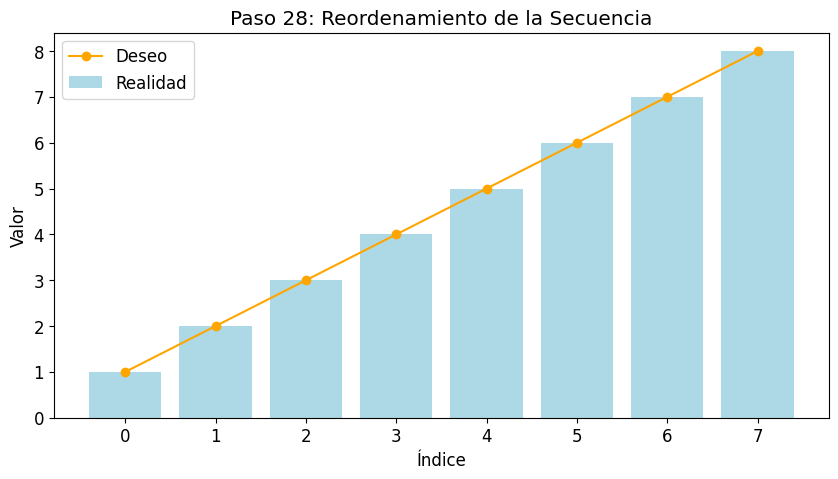

Secuencia final (Realidad Ordenada): [1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
# Mostrar el estado inicial
visualizar_progreso(realidad, deseo, paso=0)

# Ordenar y visualizar paso a paso
realidad_ordenada = bubble_sort_visual(realidad, deseo)

# Mostrar el resultado final
print("Secuencia final (Realidad Ordenada):", realidad_ordenada)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_circular(realidad, deseo, paso):
  # Normalizar las posiciones angulares de los datos
  n = len(realidad)
  angulos = np.linspace(0, 2 * np.pi, n, endpoint=False)

  # Configurar el gráfico
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
  ax.set_theta_direction(-1) # Dirección antihoraria
  ax.set_theta_offset(np.pi / 2) # Iniciar desde arriba

  # Dibujar "Deseo" (estado objetivo)
  ax.scatter(angulos, deseo, color="orange", label="Deseo", s=100, alpha=0.7)

  # Dibujar "Realidad" (estado actual)
  ax.scatter(angulos, realidad, color="blue", label="Realidad", s=100)

  # Conectar líneas entre realidad y deseo
  for i in range(n):
    ax.plot([angulos[i], angulos[i]], [realidad[i], deseo[i]], color="gray", linestyle="--", alpha=0.5)

  # Personalizar el gráfico
  plt.title(f"Paso {paso}: Estado de la Secuencia", va="bottom")
  ax.legend(loc="upper right")
  plt.show()

In [ ]:
def bubble_sort_circular(realidad, deseo):
  n = len(realidad)
  pasos = 0

  for i in range(n):
    for j in range(0, n-i-1):
      if realidad[j] > realidad[j+1]:
        # Intercambiar elementos
        realidad[j], realidad[j+1] = realidad[j+1], realidad[j]
      pasos += 1

  # Visualizar el progreso
  visualizar_circular(realidad, deseo, pasos)

  return realidad

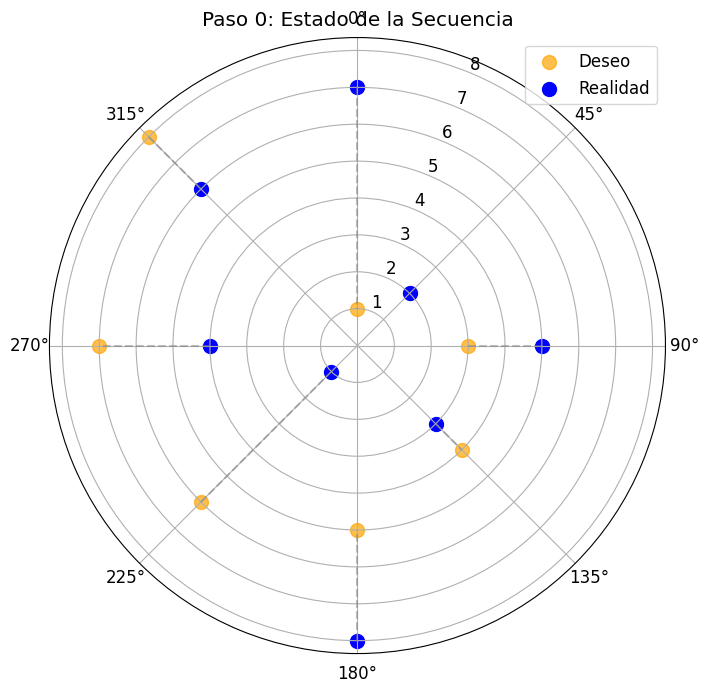

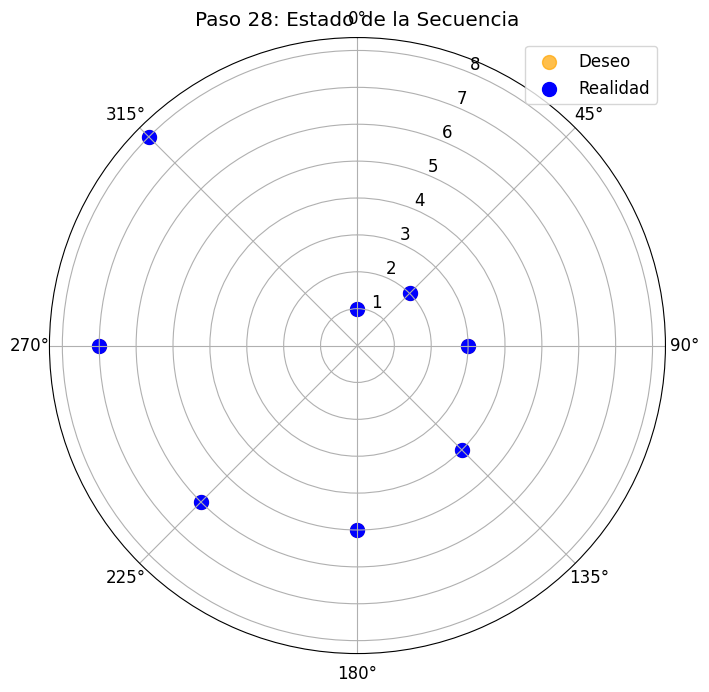

Secuencia Final (Realidad Ordenada): [1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
realidad = [7, 2, 5, 3, 8, 1, 4, 6]
deseo = sorted(realidad)

# Mostrar el estado inicial
visualizar_circular(realidad, deseo, paso=0)

# Reordenar y visualizar el progreso
realidad_ordenada = bubble_sort_circular(realidad, deseo)

# Mostrar el resultado final
print("Secuencia Final (Realidad Ordenada):", realidad_ordenada)